## LATENT SPACE EXPLORATION

### Setup for AEv3.0

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import h5py
import numpy as np
import seaborn as sns
from tqdm import tqdm

In [3]:
device = torch.device('cuda')
# device = torch.device('cpu')

In [4]:
import os
os.chdir('/home/aisinai/work/repos/nis_patient_encoding/')

In [5]:
from data.data_loader import NISDatabase

from utils.experiments import *
from utils.feature_utils import calc_output_dims

from model.autoencoder.autoencoder import AutoEncoder
from model.autoencoder.loss import CustomLoss
# from trainer.trainer import Trainer

In [6]:
# import umap
from cuml.manifold.umap import UMAP as cuUMAP

In [7]:
from sklearn.preprocessing import OrdinalEncoder

## New

In [8]:
from similarity.run_match import *

In [9]:
config_ts = json.load(open('similarity/savr_tavr.json', 'r'))
config_ts = init(config_ts)

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ae = nn.DataParallel(load_model(config_ts)).to('cuda')

db = NISDatabase(config_ts['data']['model'], 'full')
db.set_batch_size(1000)

In [10]:
# import tsnecuda
import tables
from tqdm import tqdm

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


try:
    latent_space.close()
except:
    pass

latent_space = tables.open_file(config_ts['global']['PROJECT_DIR'] + config_ts['global']['DATA_FOLDER'] + 'latent_space_embedding.h5', 'w')

lsarr = latent_space.create_earray('/', 'ls', tables.Float32Atom(), (0, 64))

for samp_batch in tqdm(db.iterator):
    ls = ae.module.latent_representation(samp_batch.to('cuda')).detach().to('cpu').numpy()
    lsarr.append(ls)

latent_space.close()

ae.module.latent_representation(samp_batch.to('cuda')).shape

In [11]:
try:
    latent_space.close()
except:
    pass

latent_space = tables.open_file(config_ts['global']['PROJECT_DIR'] + config_ts['global']['DATA_FOLDER'] + 'latent_space_embedding.h5', 'r')

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
lsd = []
step = 10
for row in tqdm(latent_space.root.ls.iterrows(start=0, step=step), total=latent_space.root.ls.shape[0] / step):
    lsd.append(row)
    
lsd = np.array(lsd)

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
1736983it [00:50, 34734.36it/s]                               


In [13]:
full_data = tables.open_file(config_ts['global']['PROJECT_DIR'] + config_ts['global']['DATA_FOLDER'] + 'safety/NIS_Pruned.h5', 'r')
# ind_mapping = tables.open_file(config_ts['global']['PROJECT_DIR'] + config_ts['global']['DATA_FOLDER'] + 'safety/NIS_2012_2014_proto_emb_red.h5', 'r').root.TRAIN

outcomes = full_data.root.outcomes
outcome_headers = full_data.root.outcome_headers[:].astype('str')

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# oc = np.empty((tsne_fitted_test.shape[0], full_data.root.outcomes.shape[1]))
oc = []

for row in tqdm(full_data.root.outcomes.iterrows(start=0, step=step), total=full_data.root.outcomes.shape[0] / step):
    oc.append(row)

oc = np.array(oc)

rd = []
for row in tqdm(full_data.root.dataset.iterrows(start=0, step=step), total=full_data.root.dataset.shape[0] / step):
    rd.append(row)
rd = np.array(rd)

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
1736983it [00:34, 50411.40it/s]                               
1736983it [01:05, 26538.95it/s]                               


In [15]:
oc[oc[:, 3] < 0, 3] = 0

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
oc[:, 4] = OrdinalEncoder().fit_transform(oc[:, 4].reshape(-1, 1)).reshape(-1)

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
oc[oc[:, 6] < 0, 6] = 0
oc[:, 6] = oc[:, 6].astype('float')

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
embedding = cuUMAP(verbose=True).fit_transform(lsd)

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
np.save(config_ts['global']['PROJECT_DIR'] + config_ts['global']['DATA_FOLDER'] + f'umap_embedding_{step}.npy', embedding)

In [19]:
embedding = np.load(config_ts['global']['PROJECT_DIR'] + config_ts['global']['DATA_FOLDER'] + f'umap_embedding_10.npy')

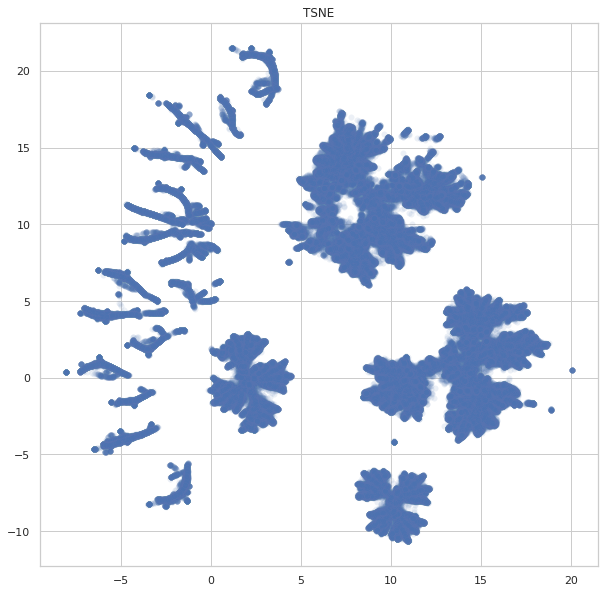

In [19]:
# 25
with sns.plotting_context('poster'):
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], alpha=0.1, linewidth=0.1, ax=ax).set(title='TSNE')

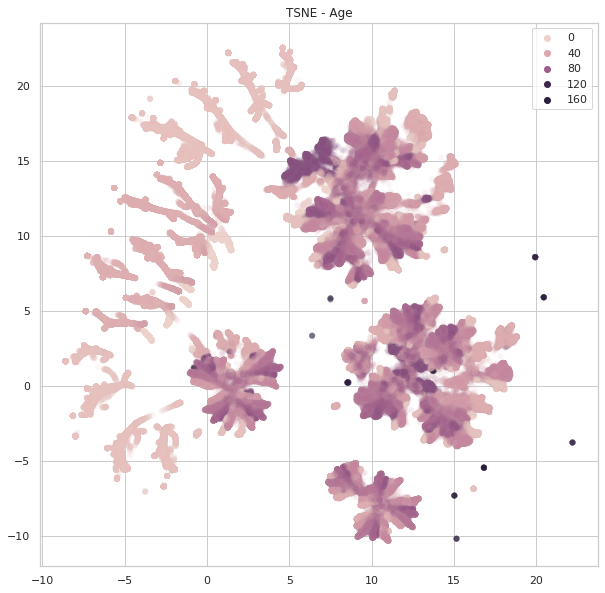

In [20]:
with sns.plotting_context('poster'):
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=rd[:, 0], alpha=0.1, linewidth=0.1, ax=ax).set(title='TSNE - Age')

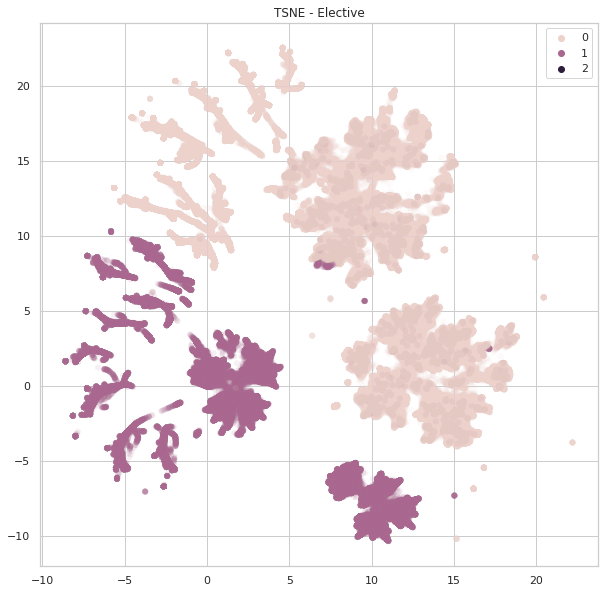

In [21]:
with sns.plotting_context('poster'):
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=rd[:, full_data.root.headers[:].tolist().index(b'ELECTIVE')], hue_norm=(0, 2), alpha=0.1, linewidth=0.1, ax=ax).set(title='TSNE - Elective')

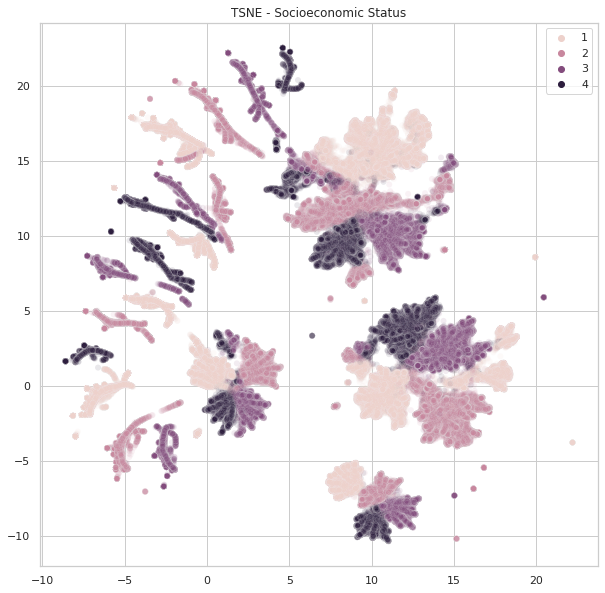

In [22]:
with sns.plotting_context('poster'):
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=rd[:, -1], alpha=0.1, linewidth=0.5, ax=ax).set(title='TSNE - Socioeconomic Status')

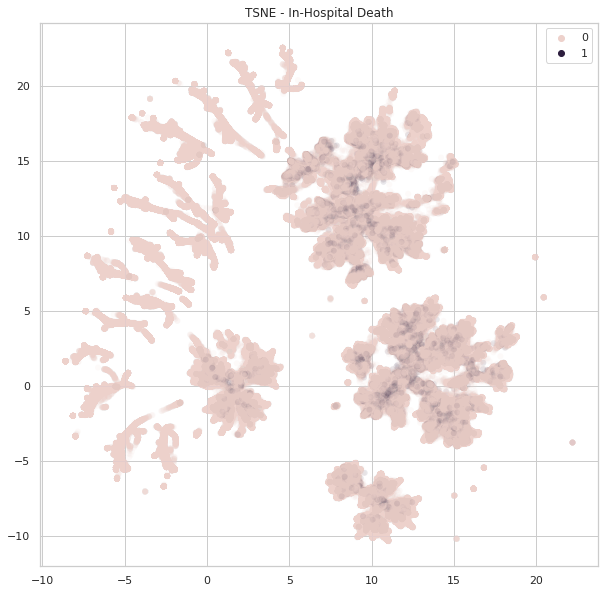

In [23]:
with sns.plotting_context('poster'):
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=oc[:, 3], hue_norm=(0, 1), alpha=0.1, linewidth=0.1, ax=ax).set(title='TSNE - In-Hospital Death')

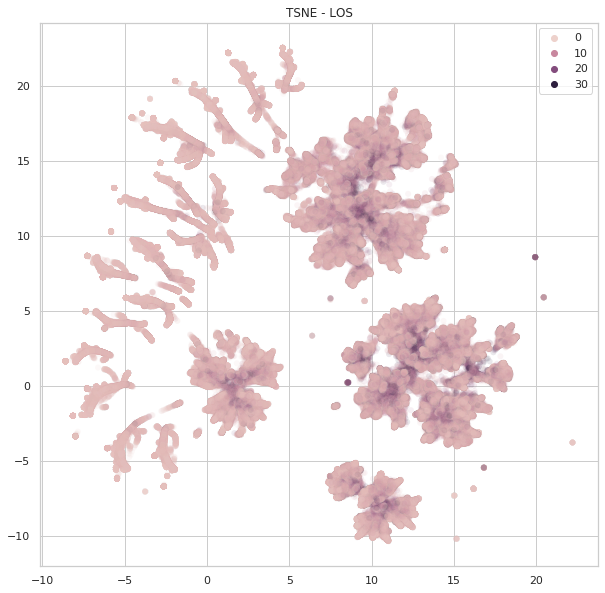

In [24]:
with sns.plotting_context('poster'):
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=oc[:, 6], hue_norm=(0, 30), alpha=0.1, linewidth=0.1, ax=ax).set(title='TSNE - LOS')

In [48]:
tsne_fitted = tsne.fit_transform(lsd)
np.savetxt(config_ts['global']['PROJECT_DIR'] + config_ts['global']['DATA_FOLDER'] + f'tsne_{step}.npy', tsne_fitted)

In [54]:
tsne_fitted_test = tsne_fitted

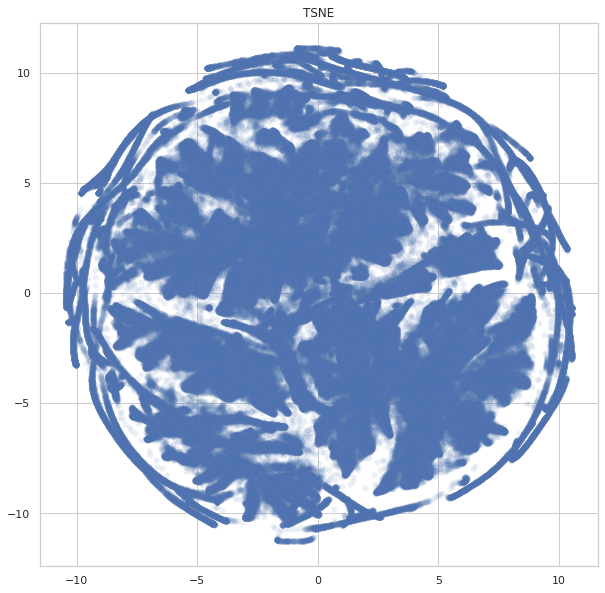

In [50]:
# 20
with sns.plotting_context('poster'):
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.scatterplot(x=tsne_fitted[:, 0], y=tsne_fitted[:, 1], alpha=0.1, linewidth=0.1, ax=ax).set(title='TSNE')

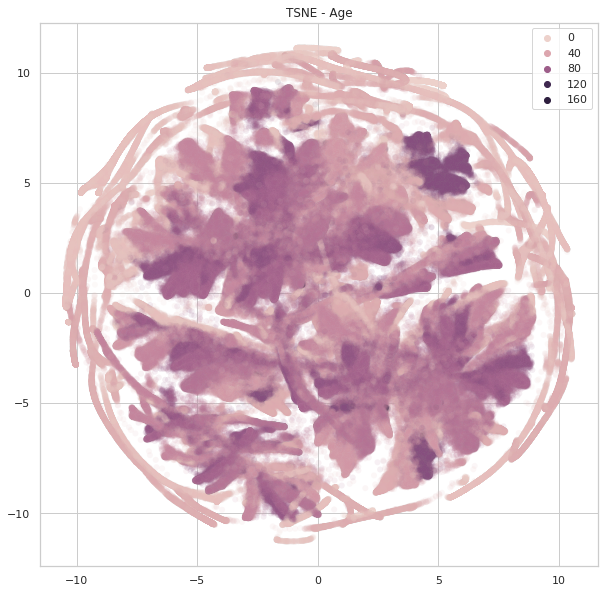

In [56]:
with sns.plotting_context('poster'):
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.scatterplot(x=tsne_fitted_test[:, 0], y=tsne_fitted_test[:, 1], hue=rd[:, 0], alpha=0.1, linewidth=0.1, ax=ax).set(title='TSNE - Age')

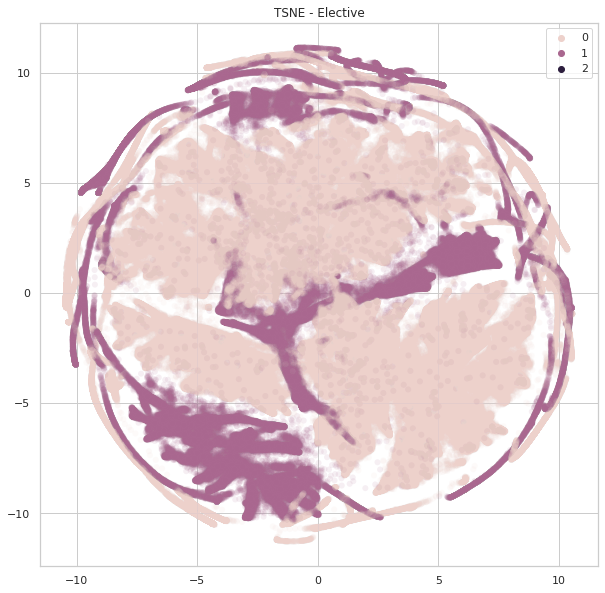

In [71]:
with sns.plotting_context('poster'):
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.scatterplot(x=tsne_fitted_test[:, 0], y=tsne_fitted_test[:, 1], hue=rd[:, full_data.root.headers[:].tolist().index(b'ELECTIVE')], hue_norm=(0, 2), alpha=0.1, linewidth=0.1, ax=ax).set(title='TSNE - Elective')

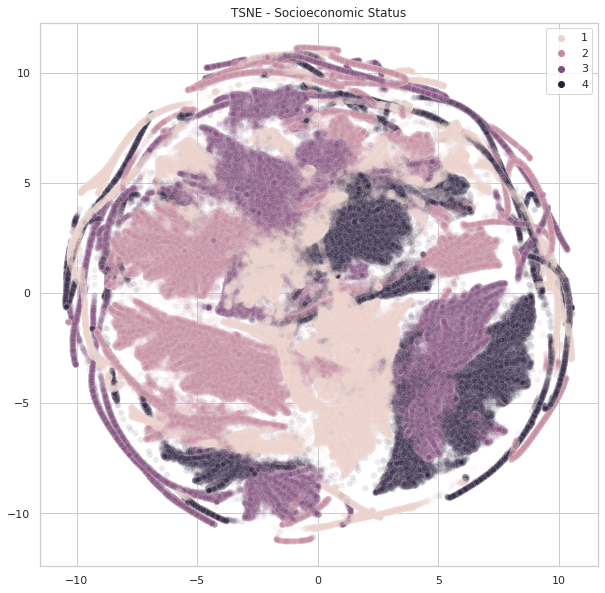

In [66]:
with sns.plotting_context('poster'):
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.scatterplot(x=tsne_fitted_test[:, 0], y=tsne_fitted_test[:, 1], hue=rd[:, -1], alpha=0.1, linewidth=0.5, ax=ax).set(title='TSNE - Socioeconomic Status')

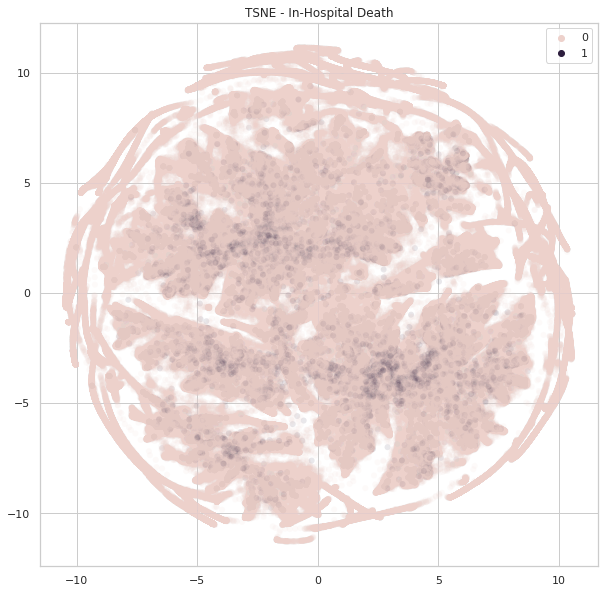

In [69]:
with sns.plotting_context('poster'):
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.scatterplot(x=tsne_fitted_test[:, 0], y=tsne_fitted_test[:, 1], hue=oc[:, 3], hue_norm=(0, 1), alpha=0.1, linewidth=0.1, ax=ax).set(title='TSNE - In-Hospital Death')

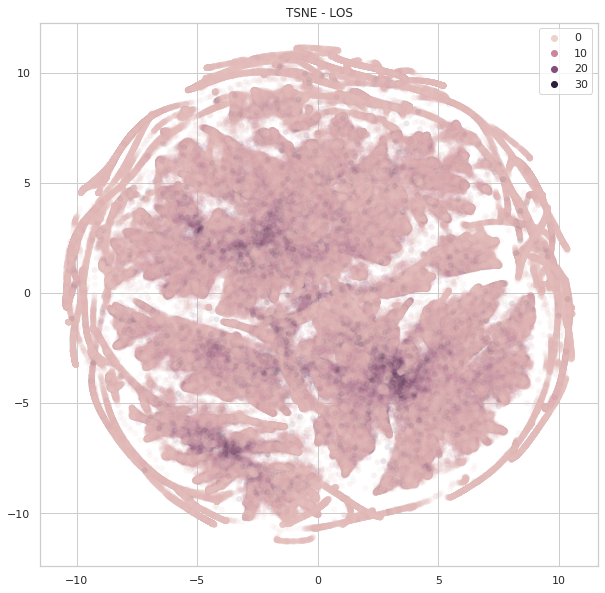

In [68]:
with sns.plotting_context('poster'):
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.scatterplot(x=tsne_fitted_test[:, 0], y=tsne_fitted_test[:, 1], hue=oc[:, 6], hue_norm=(0, 30), alpha=0.1, linewidth=0.1, ax=ax).set(title='TSNE - LOS')

### Outcomes

In [22]:
config_ts['global']

{'DEVICE': 'cuda:0',
 'PROJECT_DIR': '/home/aisinai/work/repos/nis_patient_encoding/',
 'DATA_FOLDER': 'data/raw/',
 'PSM_RESULTS': 'study_type/savr_tavr/psm_result/',
 'STUDY': 'study_type/savr_tavr/',
 'REFERENCES': ['https://www.onlinejacc.org/content/71/21/2489',
  'https://www.nejm.org/doi/full/10.1056/NEJMoa1816885?query=recirc_curatedRelated_article',
  'https://www.nejm.org/doi/full/10.1056/NEJMoa1814052']}

In [23]:
full_data = tables.open_file(config_ts['global']['PROJECT_DIR'] + config_ts['global']['DATA_FOLDER'] + 'safety/NIS_Pruned.h5', 'r')
# ind_mapping = tables.open_file(config_ts['global']['PROJECT_DIR'] + config_ts['global']['DATA_FOLDER'] + 'safety/NIS_2012_2014_proto_emb_red.h5', 'r').root.TRAIN

outcomes = full_data.root.outcomes
outcome_headers = full_data.root.outcome_headers

In [ ]:
fd = full_data.root.dataset[::100, :]

### t-SNE

In [17]:
latent_representation = ae.latent_representation(samp_batch).detach()

In [21]:
from sklearn.manifold import TSNE
latent_space_embedded = TSNE(n_components=2, random_state=0)

In [22]:
latent_space_embedded.fit(latent_representation)

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=0, verbose=0)

[Text(0.5, 1.0, 'TSNE')]

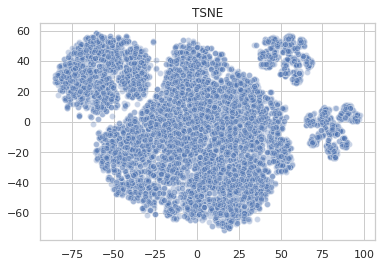

In [23]:
import seaborn as sns
sns.set(style="whitegrid")
sns.scatterplot(*latent_space_embedded.embedding_.T, alpha=0.3).set(title='TSNE')

Color based on outcome's data.

In [24]:
outcome_headers[:]

array([b'APRDRG', b'APRDRG_Risk_Mortality', b'APRDRG_Severity', b'DIED',
       b'DISPUNIFORM', b'DRG', b'LOS', b'TOTCHG'], dtype='|S21')

In [25]:
batch_mapping = ind_mapping[:latent_representation.shape[0]]
batch_outcomes = outcomes[batch_mapping, :]

In [38]:
batch_outcomes[batch_outcomes[:, 3] == -128, 3] = 0

In [42]:
db.headers

array([b'AGE', b'CHRONB01', b'CHRONB02', b'CHRONB03', b'CHRONB04',
       b'CHRONB05', b'CHRONB06', b'CHRONB07', b'CHRONB08', b'CHRONB09',
       b'CHRONB10', b'CHRONB11', b'CHRONB12', b'CHRONB13', b'CHRONB14',
       b'CHRONB15', b'CHRONB16', b'CHRONB17', b'CHRONB18', b'CHRONB19',
       b'CHRONB20', b'CHRONB21', b'CHRONB22', b'CHRONB23', b'CHRONB24',
       b'CHRONB25', b'CHRONB26', b'CHRONB27', b'CHRONB28', b'CHRONB29',
       b'CHRONB30', b'DX01', b'DX02', b'DX03', b'DX04', b'DX05', b'DX06',
       b'DX07', b'DX08', b'DX09', b'DX10', b'DX11', b'DX12', b'DX13',
       b'DX14', b'DX15', b'DX16', b'DX17', b'DX18', b'DX19', b'DX20',
       b'DX21', b'DX22', b'DX23', b'DX24', b'DX25', b'DX26', b'DX27',
       b'DX28', b'DX29', b'DX30', b'ECODE01', b'ECODE02', b'ECODE03',
       b'ECODE04', b'ELECTIVE', b'FEMALE', b'HCUP_ED', b'PR01', b'PR02',
       b'PR03', b'PR04', b'PR05', b'PR06', b'PR07', b'PR08', b'PR09',
       b'PR10', b'PR11', b'PR12', b'PR13', b'PR14', b'PR15', b'TRAN_IN',
   

[Text(0.5, 1.0, 'TSNE - Mortality')]

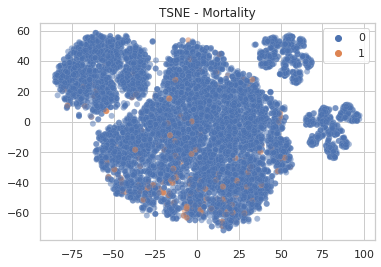

In [39]:
sns.scatterplot(*latent_space_embedded.embedding_.T, hue=batch_outcomes[:, 3], alpha=0.5, linewidth=0.1).set(title='TSNE - Mortality')

[Text(0.5, 1.0, 'TSNE - APRDRG_Mortality_Risk')]

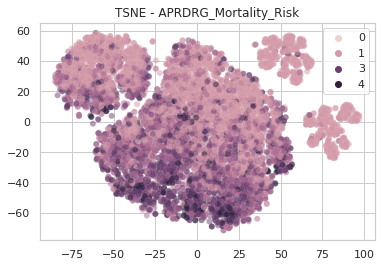

In [27]:
sns.scatterplot(*latent_space_embedded.embedding_.T, hue=batch_outcomes[:, 1], alpha=0.5, linewidth=0.1).set(title='TSNE - APRDRG_Mortality_Risk')

[Text(0.5, 1.0, 'TSNE - LOS')]

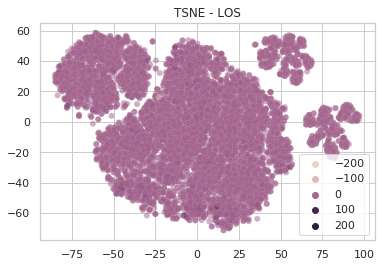

In [28]:
sns.scatterplot(*latent_space_embedded.embedding_.T, hue=batch_outcomes[:, 6], alpha=0.5, linewidth=0.1).set(title='TSNE - LOS')

[Text(0.5, 1.0, 'TSNE - Disposition')]

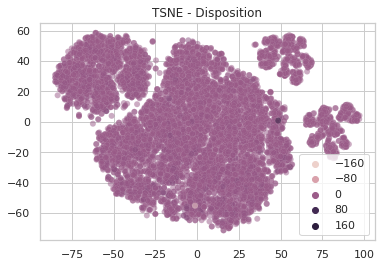

In [29]:
sns.scatterplot(*latent_space_embedded.embedding_.T, hue=batch_outcomes[:, 4], alpha=0.5, linewidth=0.1).set(title='TSNE - Disposition')

[Text(0.5, 1.0, 'TSNE - Age')]

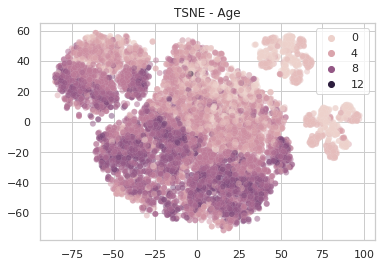

In [41]:
sns.scatterplot(*latent_space_embedded.embedding_.T, hue=samp_batch[:, 0], alpha=0.5, linewidth=0.1).set(title='TSNE - Age')

In [44]:
headers = db.headers.tolist()

[Text(0.5, 1.0, 'TSNE - Elective')]

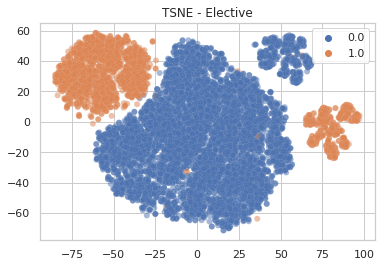

In [51]:
sns.scatterplot(*latent_space_embedded.embedding_.T, hue=samp_batch[:, headers.index(b'ELECTIVE')], alpha=0.5, linewidth=0.1).set(title='TSNE - Elective')

### PCA

In [30]:
from sklearn.decomposition import PCA
latent_space_pca = PCA(n_components=2, random_state=0, whiten=True)

In [31]:
latent_space_pca.fit(latent_representation)
pca_transform = latent_space_pca.transform(latent_representation).T

[Text(0.5, 1.0, 'PCA')]

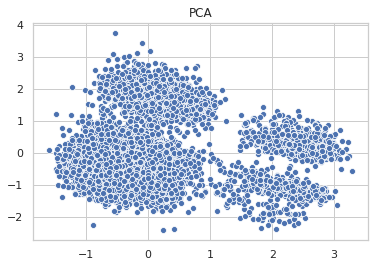

In [32]:
sns.set(style="whitegrid")
sns.scatterplot(*pca_transform).set(title='PCA')

[Text(0.5, 1.0, 'TSNE - Mortality')]

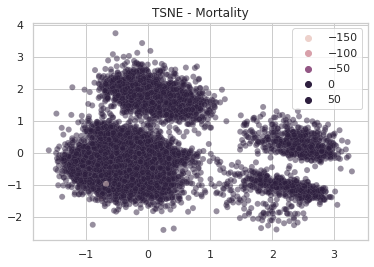

In [33]:
sns.scatterplot(*pca_transform, hue=batch_outcomes[:, 3], alpha=0.5, linewidth=0.1).set(title='TSNE - Mortality')

[Text(0.5, 1.0, 'TSNE - APRDRG')]

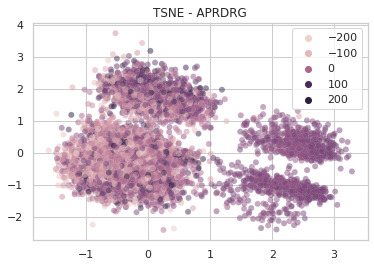

In [34]:
sns.scatterplot(*pca_transform, hue=batch_outcomes[:, 0], alpha=0.5, linewidth=0.1).set(title='TSNE - APRDRG')

[Text(0.5, 1.0, 'TSNE - APRDRG_Mortality_Risk')]

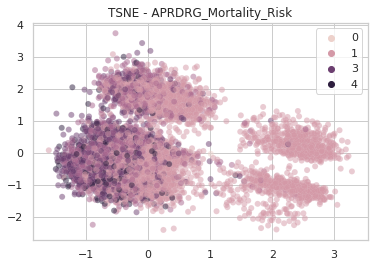

In [35]:
sns.scatterplot(*pca_transform, hue=batch_outcomes[:, 1], alpha=0.5, linewidth=0.1).set(title='TSNE - APRDRG_Mortality_Risk')

[Text(0.5, 1.0, 'TSNE - LOS')]

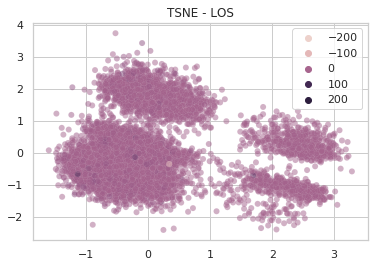

In [36]:
sns.scatterplot(*pca_transform, hue=batch_outcomes[:, 6], alpha=0.5, linewidth=0.1).set(title='TSNE - LOS')

[Text(0.5, 1.0, 'TSNE - Disposition')]

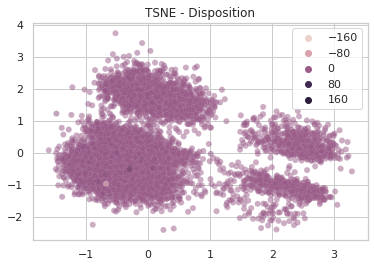

In [37]:
sns.scatterplot(*pca_transform, hue=batch_outcomes[:, 4], alpha=0.5, linewidth=0.1).set(title='TSNE - Disposition')